In [1]:
# Import custom classes
from model.BlackScholes import BlackScholes
from model.BrownianMotion import BrownianMotion
from model.Heston import Heston
from model.Greeks import Greeks
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Set Parameters
S = 100.0
K = 110.0
r = .04
sigma = .15

n_days=250
M = 5000
T = n_days/250


In [3]:
# Test out Black and Scholes Analytic Solution
BS = BlackScholes(S, K, r, sigma, n_days)
call_price = BS.european_option(type='call')
print(f"BS Call Price: {round(call_price,2)}")

put_price = BS.european_option(type='put')
print(f"BS Put Price: {round(put_price,2)}")


BS Call Price: 3.72
BS Put Price: 9.4


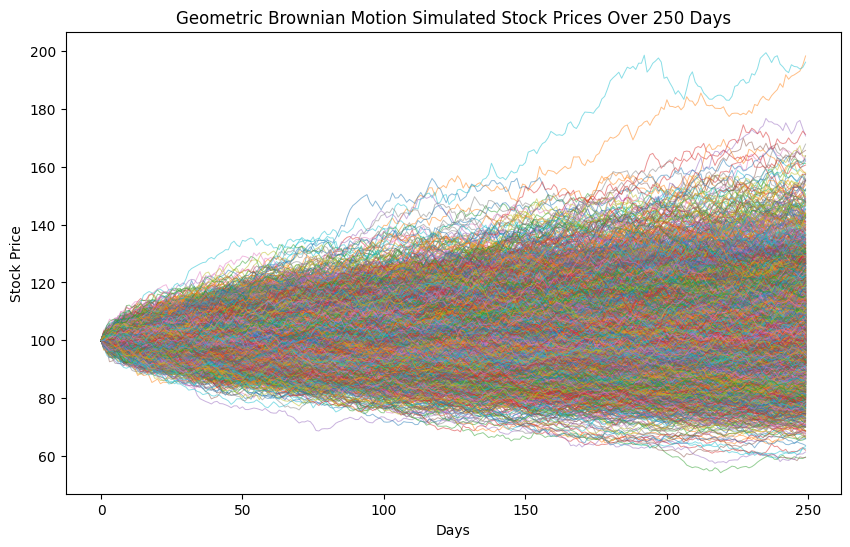

In [4]:
# Test out Geometric Brownian Motion
BM = BrownianMotion(S, K, r, sigma, M, n_days)
BM.simulate_stock_prices()

# Plotting all simulated stock prices
plt.figure(figsize=(10, 6))
for i in range(BM.prices.shape[0]):
    plt.plot(BM.prices[i], alpha=0.5, linewidth=0.7)  # Use alpha for transparency

plt.title(f'Geometric Brownian Motion Simulated Stock Prices Over {n_days} Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()


In [5]:
# Compare BM and the number of simulations
M = 1000000
call_pay_offs = []
put_pay_offs = []
BM = BrownianMotion(S, K, r, sigma, M, n_days).simulate_stock_prices()

# Iterate over and create moving average payoff
for i in range(100, M, 1000):
    
    time_value = np.exp(-r*T)
        
    call_val = time_value * np.maximum(BM.prices[0:i,-1] - K, 0).mean()
    put_val = time_value * np.maximum(K - BM.prices[0:i,-1], 0).mean()
    
    call_pay_offs.append(call_val)
    put_pay_offs.append(put_val)


# Calculate option prices
call_price = BM.get_option_price(type='call')
put_price = BM.get_option_price(type='put')

print(f"GBM Call Price: {round(call_price,2)}")
print(f"GBM Put Price: {round(put_price,2)}")

GBM Call Price: 3.7
GBM Put Price: 9.4


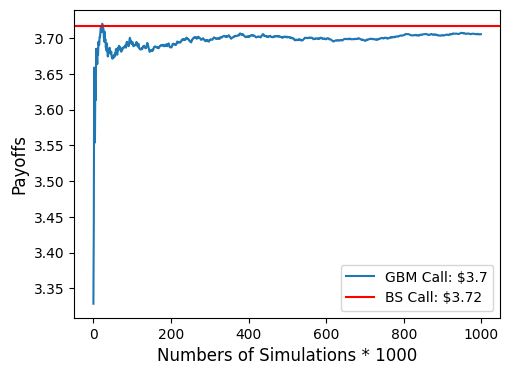

In [17]:
plt.figure(figsize=(5.5, 4))

plt.plot(call_pay_offs, label = f'GBM Call: ${round(call_price,2)}')
plt.axhline(BS_call, label = f'BS Call: ${round(BS_call,2)}', color='red')
plt.xlabel('Numbers of Simulations * 1000', fontsize=12)
plt.ylabel('Payoffs', fontsize=12)
plt.legend()
plt.savefig('GBM_call', bbox_inches="tight")

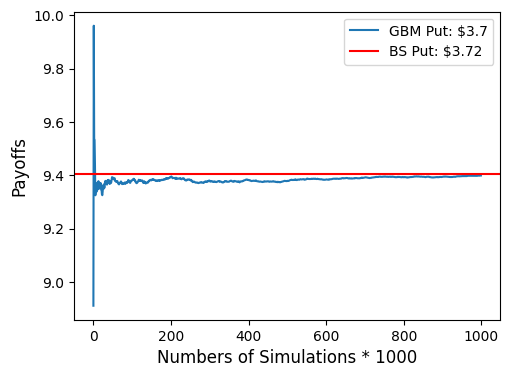

In [18]:
plt.figure(figsize=(5.5, 4))

plt.plot(put_pay_offs, label = f'GBM Put: ${round(call_price,2)}')
plt.axhline(BS_put, label = f'BS Put: ${round(BS_call,2)}', color='red')
plt.xlabel('Numbers of Simulations * 1000', fontsize=12)
plt.ylabel('Payoffs', fontsize=12)
plt.legend()
plt.savefig('GBM_put', bbox_inches="tight")

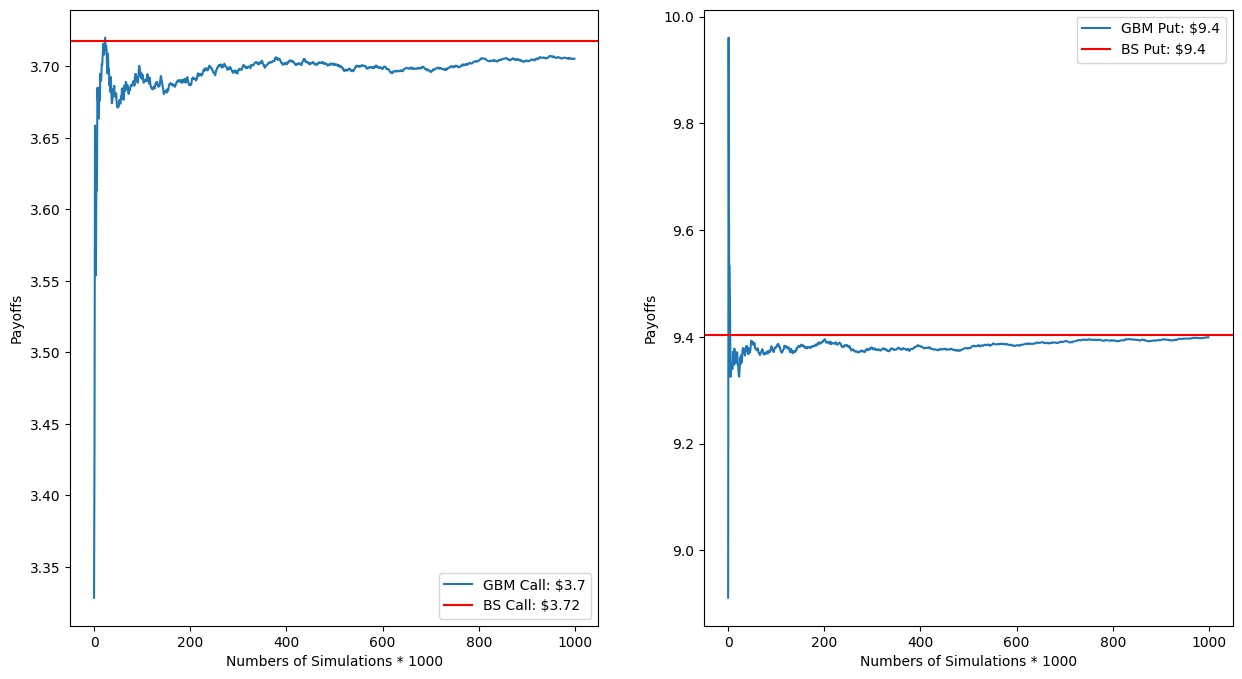

In [6]:
f, ax = plt.subplots(1,2, figsize = (15,8))

BS_call = BS.european_option(type='call')

ax[0].plot(call_pay_offs, label = f'GBM Call: ${round(call_price,2)}')
ax[0].axhline(BS_call, label = f'BS Call: ${round(BS_call,2)}', color='red')
ax[0].set_xlabel('Numbers of Simulations * 1000')
ax[0].set_ylabel('Payoffs')
ax[0].legend()

BS_put = BS.european_option(type='put')

ax[1].plot(put_pay_offs, label = f'GBM Put: ${round(put_price,2)}')
ax[1].axhline(BS_put, label = f'BS Put: ${round(BS_put,2)}', color='red')
ax[1].set_xlabel('Numbers of Simulations * 1000')
ax[1].set_ylabel('Payoffs')
ax[1].legend()

In [7]:
# Test out Heston Simulated prices
GK = Greeks(S, K, r, sigma, n_days)

kappa = GK.vega() # Rate of mean reversion

theta_call = GK.theta(type='call') # Long-term variance
rho_call = GK.rho(type='call')  # Correlation between the stock and its variance

theta_put = GK.theta(type='put') # Long-term variance
rho_put = GK.rho(type='put')  # Correlation between the stock and its variance

In [12]:
# Compare BM and the number of simulations
M = 100000
HS_call_pay_offs = []
HS_put_pay_offs = []

HS_call = Heston(S, K, r, sigma, M, theta_call, rho_call, kappa=kappa, n_days=250, trading_days=250, seed=6644, type=None)
HS_call.simulate_stock_prices()

HS_put = Heston(S, K, r, sigma, M, theta_put, rho_put, kappa=kappa, n_days=250, trading_days=250, seed=6644, type=None)
HS_put.simulate_stock_prices()

time_value = np.exp(-r*T)

# Iterate over and create moving average payoff
for i in range(100, M, 1000):
    
    HS_call_val = time_value * np.maximum(HS_call.prices[0:i,-1] - K, 0).mean()
    HS_put_val = time_value * np.maximum(K - HS_put.prices[0:i,-1], 0).mean()
    
    HS_call_pay_offs.append(HS_call_val)
    HS_put_pay_offs.append(HS_put_val)


# Calculate final option prices
HS_call_price = HS_call.get_option_price(type='call')
HS_put_price = HS_put.get_option_price(type='put')

print(f"Heston Call Price: {round(HS_call_price,2)}")
print(f"Heston Put Price: {round(HS_put_price,2)}")

Heston Call Price: 18.86
Heston Put Price: 11.72


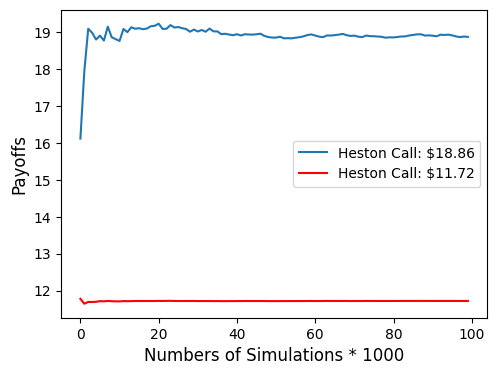

In [15]:
plt.figure(figsize=(5.5, 4))

plt.plot(HS_call_pay_offs, label = f'Heston Call: ${round(HS_call_price,2)}')
plt.plot(HS_put_pay_offs, label = f'Heston Call: ${round(HS_put_price,2)}', color='red')
plt.xlabel('Numbers of Simulations * 1000', fontsize=12)
plt.ylabel('Payoffs', fontsize=12)
plt.legend()
plt.savefig('heston', bbox_inches="tight")
